In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent


('2017-08-23',)

In [11]:
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
previous_year= dt.datetime(2017,8,23) - dt.timedelta(days= 365)
print(previous_year)

2016-08-23 00:00:00


In [12]:
# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).all()


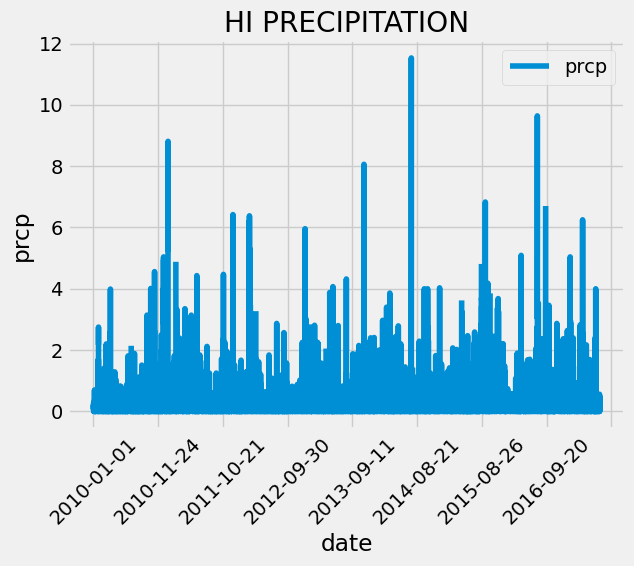

In [13]:
# Select only the "date" and "prcp" values.
# Load the query results into a Pandas DataFrame. Explicitly set the column names.

qurey_panda = pd.DataFrame(query,columns=[
                            'date',
                            'prcp'])
qurey_panda.head()

# Sort the DataFrame values by "date".
qurey_panda = qurey_panda.sort_values('date')
qurey_panda.head()

# Plot the results by using the DataFrame plot method, as the following image shows:
qurey_panda.plot(x='date', y='prcp',rot= 45)
plt.title ("HI PRECIPITATION")
plt.ylabel('prcp')
plt.savefig('precipitaion image')
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
qurey_panda.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
Numbers_of_stations = session.query(Measurement.station).group_by(Measurement.station).count()
Numbers_of_stations

9

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active_stations  = session.query(Measurement.station,func.count(Measurement.station)).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.station).desc()).all()
most_active_stations 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
#which station id has the greatest number of observations?git
greatest_avtive_station  = session.query(Measurement.station,func.count(Measurement.station)).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.station).desc()).first()
greatest_avtive_station

('USC00519281', 2772)

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#calculate the lowest, highest, avg temp use set techniqe

temp_status = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                     filter(Measurement.station=='USC00519281').all ()
temp_status

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, '')

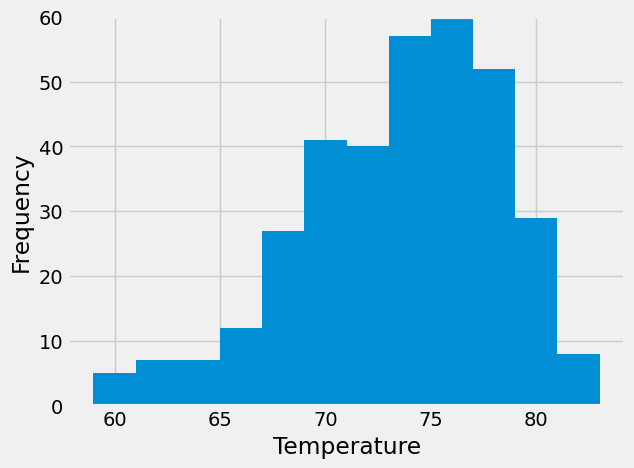

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active = session.query(Measurement.tobs).\
                            filter(Measurement.station== 'USC00519281').\
                            filter(Measurement.date >= previous_year).all()
most_active

#create datafram
temp_df = pd.DataFrame(most_active)
temp_df.head()

# #create histogram 
histagram_plot = temp_df.hist(bins=12) 
plt.ylabel('Frequency')
plt.xlabel ('Temperature')
plt.ylim(0,60)
plt.title ("")


# Close Session

In [ ]:
# Close Session
session.close()